## Heart Disease Prediction

In [ ]:
# Added necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import joblib
import  os
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
RANDOM_STATE = 42
DATA_PATH = "./Data/heart_disease.csv"
SAVE_DIR = "./Data"
os.makedirs(SAVE_DIR, exist_ok=True)

In [ ]:
# Loaded the data set
data = pd.read_csv(DATA_PATH)
print("Shape:", data.shape)

Shape: (319795, 18)


In [ ]:
pip install -r requirements.txt

In [ ]:
#To see the first five 5 rows head is used.
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# Info is used to see the data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# To get statistical analysis describe is used.
data.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


# Transforming for Outliers

/var/folders/2t/j7j8ths96pd2l4h4ws_nd4_80000gn/T/ipykernel_83020/3453837795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")


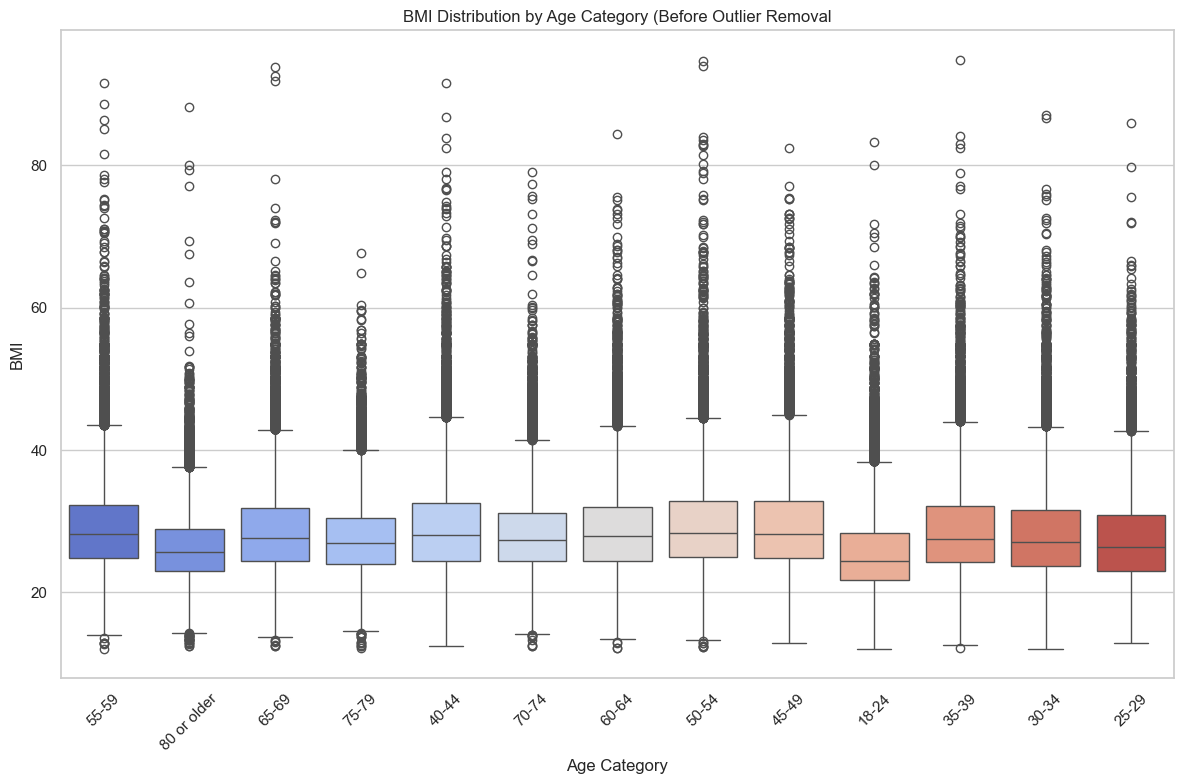

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Created a boxplot to show the distribution of BMI across different age categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('BMI Distribution by Age Category (Before Outlier Removal')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.tight_layout()

In [ ]:
# Identified the numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

# Calculated the z-scores for each numerical column
z_scores = np.abs((data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std())

# Setting a threshold for z-scores (e.g., 3)
threshold = 3.5

# Creating a mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Removing rows with outliers
data = data[~outlier_mask]

# Printing the shape of the modified Data set
print("Data set shape after removing outliers:", data.shape)

Data set shape after removing outliers: (315266, 18)


/var/folders/2t/j7j8ths96pd2l4h4ws_nd4_80000gn/T/ipykernel_83020/3520448818.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")


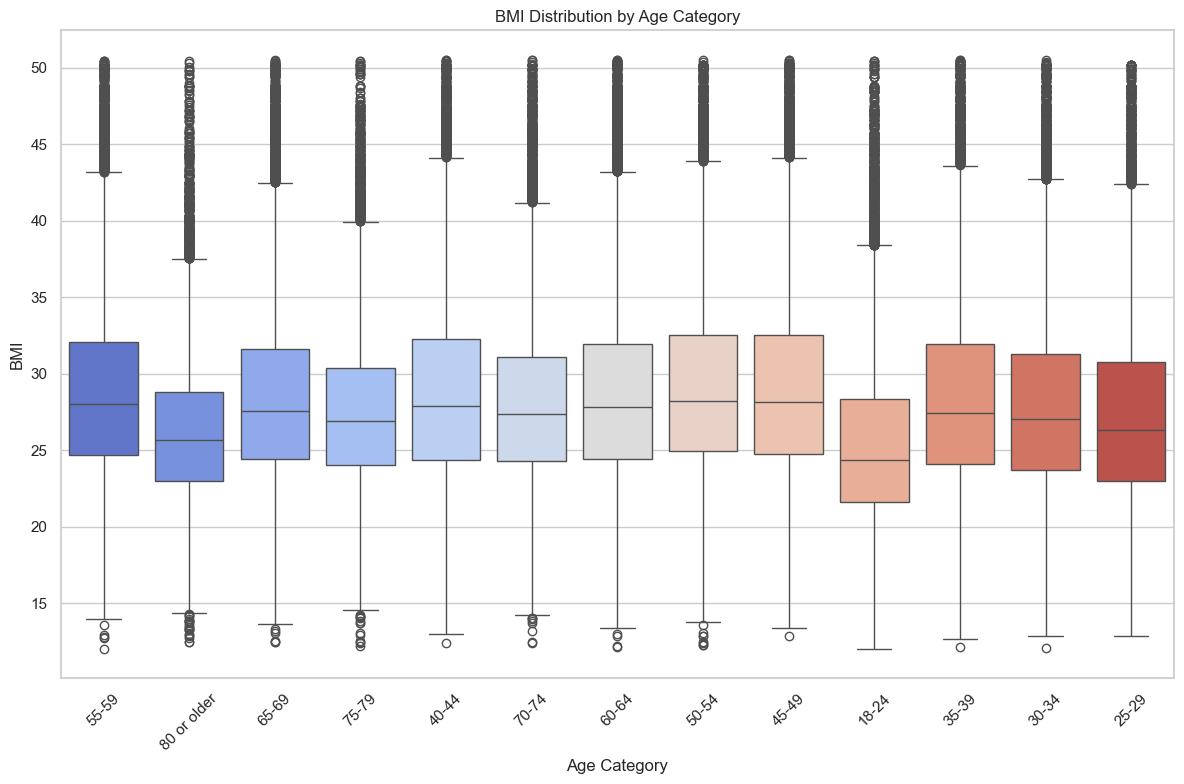

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Created a boxplot to show the distribution of BMI across different age categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('BMI Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.tight_layout()

In [ ]:
df = data.copy()

# Numeric columns (int/float)
num_cols = df.select_dtypes(include=[np.number]).columns

# z-score across numeric columns
z = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std(ddof=0)
mask_outliers = (z.abs() > 3.5).any(axis=1)

print("Rows before:", df.shape[0])
df = df[~mask_outliers].reset_index(drop=True)
print("Rows after outlier removal:", df.shape[0])

Rows before: 315266
Rows after outlier removal: 312175


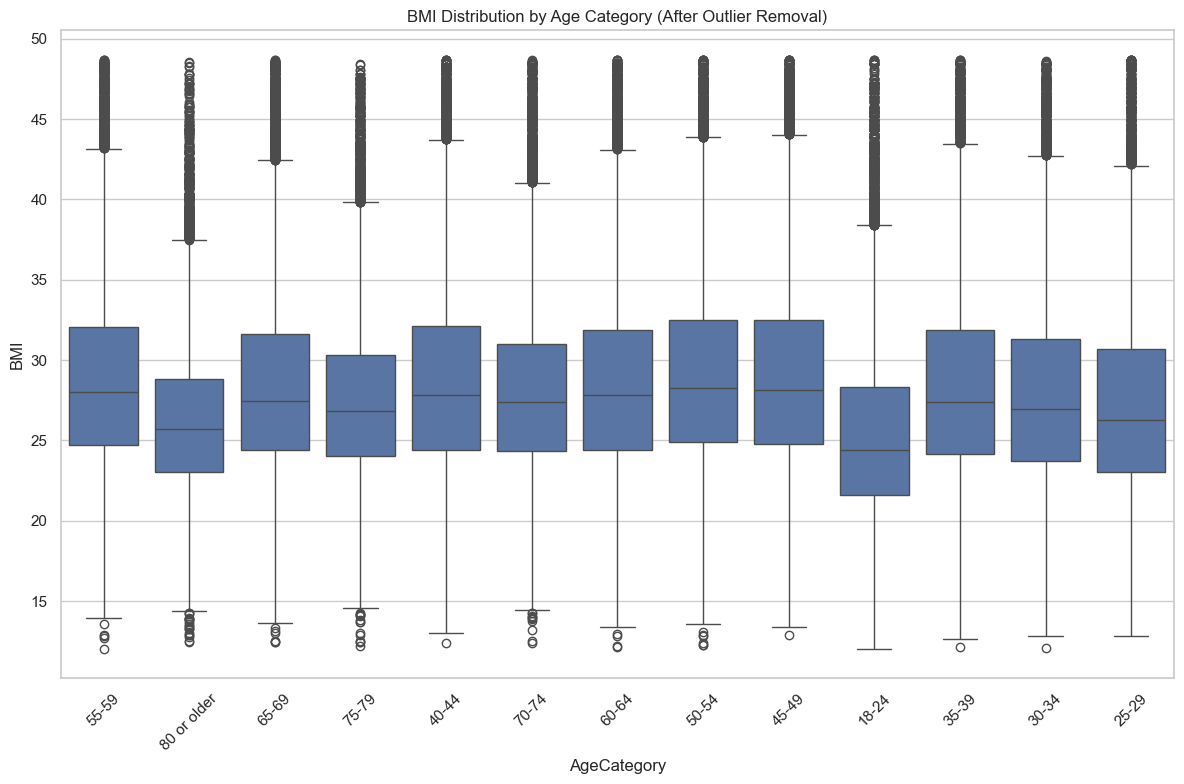

In [ ]:
# Boxplot after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=df)
plt.xticks(rotation=45)
plt.title('BMI Distribution by Age Category (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Showing Correlation

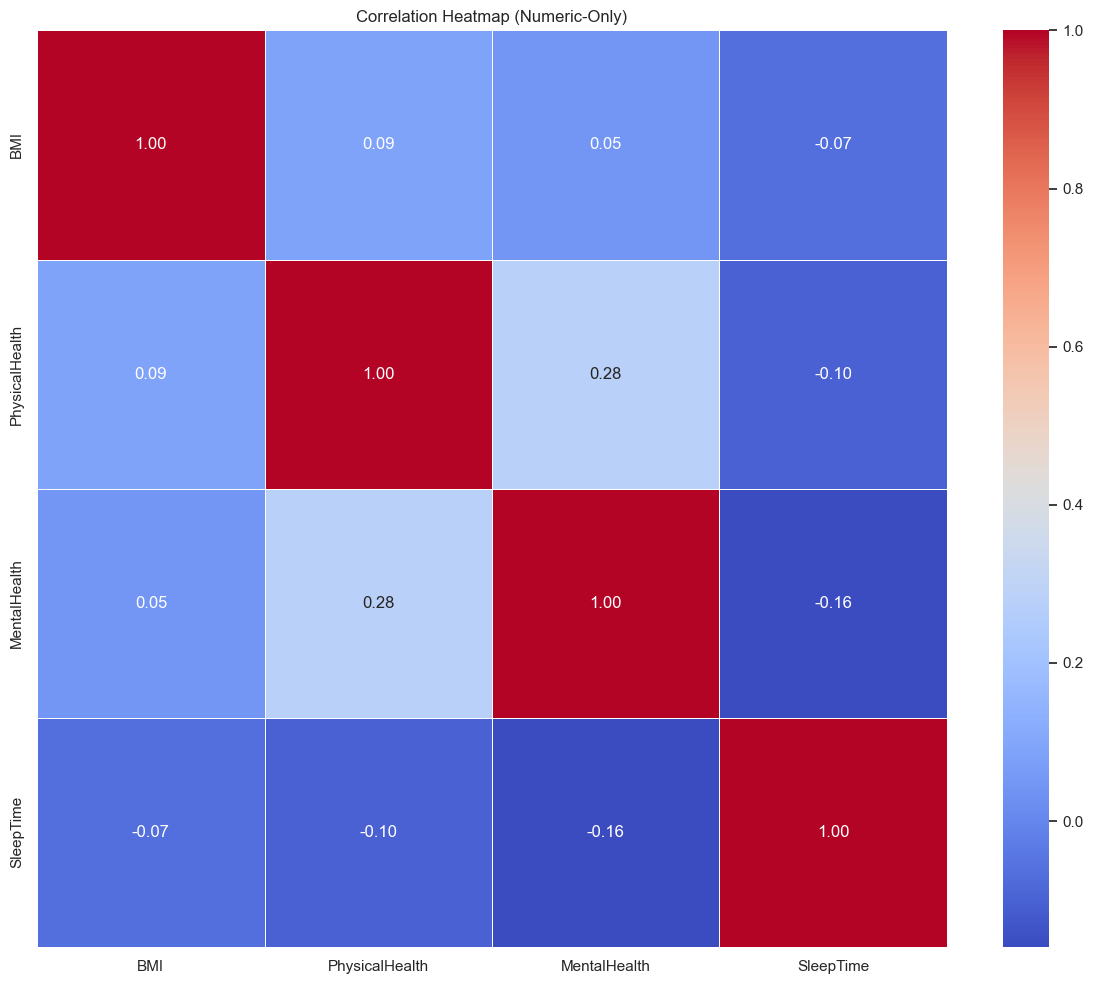

In [ ]:
# heatmap for correlation
# Only use numeric columns for correlation
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap (Numeric-Only)")
plt.tight_layout()
plt.show()

#  Categorical EDA (Race, HeartDisease by Race, Diabetic)

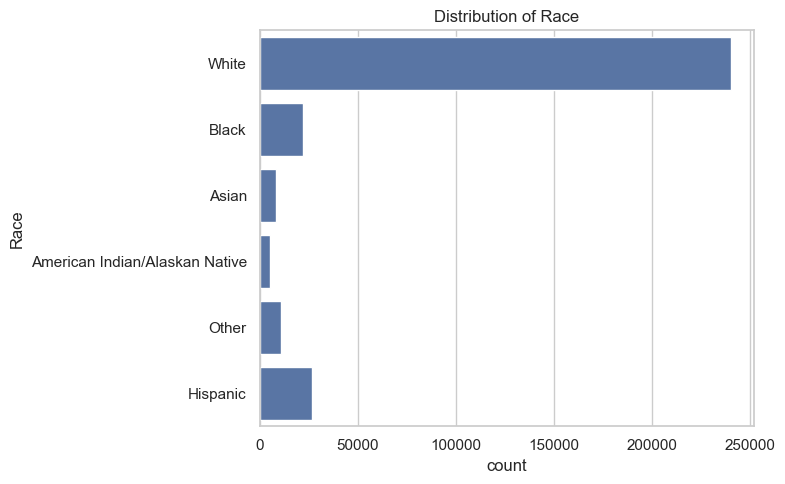

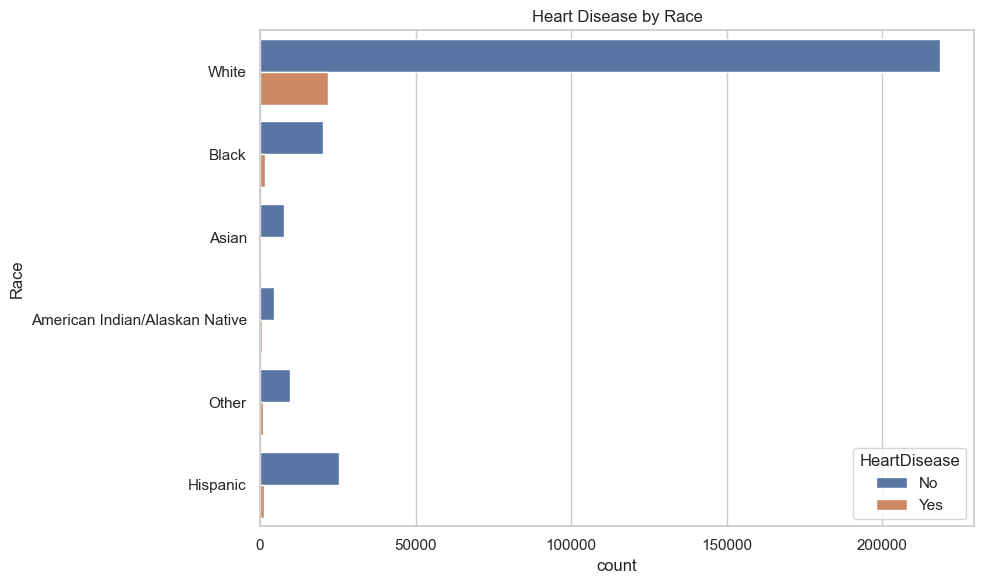

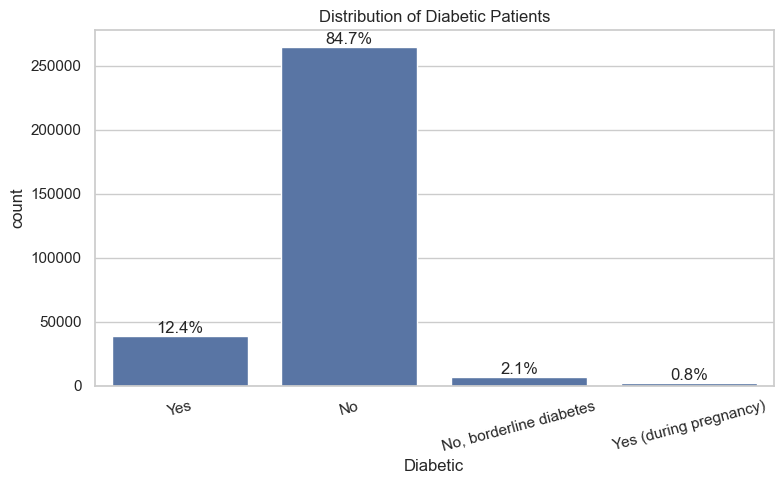

In [ ]:
# Categorical EDA

plt.figure(figsize=(8, 5))
sns.countplot(y='Race', data=df)
plt.title('Distribution of Race')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Race', hue='HeartDisease', data=df)
plt.title('Heart Disease by Race')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Diabetic', data=df)
plt.title('Distribution of Diabetic Patients')
plt.xticks(rotation=15)

total = len(df['Diabetic'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = f'{100*height/total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Train/test split & preprocessing

In [ ]:
# Features/target (keep target as strings "Yes"/"No"; pipeline handles X)
assert 'HeartDisease' in df.columns, "HeartDisease column not found."
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']  # strings are fine for y in sklearn

# Identify column types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical:", cat_cols)
print("Numeric:", num_cols)

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)
print("Train:", X_train.shape, " Test:", X_test.shape)

Categorical: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Numeric: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Train: (218522, 17)  Test: (93653, 17)


# Train models (LogReg & RF via Pipeline)

In [ ]:
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200, max_depth=5, random_state=RANDOM_STATE))
])

# Train + simple timing
t0 = time.time()
log_reg.fit(X_train, y_train)
t1 = time.time()
rf.fit(X_train, y_train)
t2 = time.time()

print(f"LogReg training time: {t1 - t0:.2f}s")
print(f"RF training time:     {t2 - t1:.2f}s")

LogReg training time: 1.46s
RF training time:     9.03s


# EVALUATION OF THE MODELS

=== Logistic Regression ===
Accuracy: 0.9173
ROC-AUC: 0.8425
Precision (Yes): 0.5447
Recall (Yes): 0.1030
F1 (Yes): 0.1732

Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.99      0.96     85776
         Yes       0.54      0.10      0.17      7877

    accuracy                           0.92     93653
   macro avg       0.73      0.55      0.56     93653
weighted avg       0.89      0.92      0.89     93653



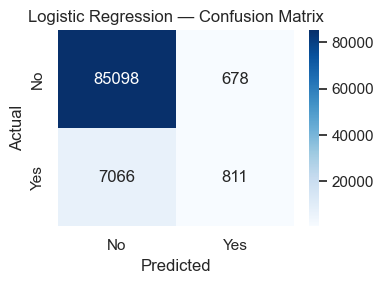

=== Random Forest ===
Accuracy: 0.9165
ROC-AUC: 0.8123
Precision (Yes): 0.6918
Recall (Yes): 0.0128
F1 (Yes): 0.0252

Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96     85776
         Yes       0.69      0.01      0.03      7877

    accuracy                           0.92     93653
   macro avg       0.80      0.51      0.49     93653
weighted avg       0.90      0.92      0.88     93653



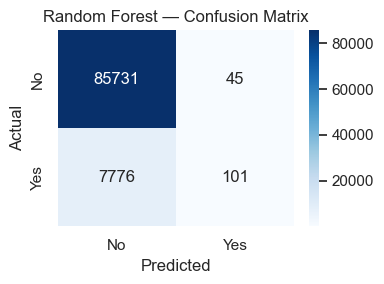

In [ ]:
def evaluate(model, X_te, y_te, name="Model"):
    y_pred = model.predict(X_te)
    auc = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
        y_true_bin = (y_te == "Yes").astype(int)
        try:
            auc = roc_auc_score(y_true_bin, y_proba)
        except Exception:
            auc = None

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, pos_label="Yes", zero_division=0)
    rec = recall_score(y_te, y_pred, pos_label="Yes", zero_division=0)
    f1 = f1_score(y_te, y_pred, pos_label="Yes", zero_division=0)
    cm = confusion_matrix(y_te, y_pred, labels=["No", "Yes"])

    print(f"=== {name} ===")
    print("Accuracy:", f"{acc:.4f}")
    if auc is not None:
        print("ROC-AUC:", f"{auc:.4f}")
    print("Precision (Yes):", f"{prec:.4f}")
    print("Recall (Yes):", f"{rec:.4f}")
    print("F1 (Yes):", f"{f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_te, y_pred, zero_division=0))
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No","Yes"], yticklabels=["No","Yes"])
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return {
        "accuracy": acc,
        "roc_auc": auc,
        "precision_yes": prec,
        "recall_yes": rec,
        "f1_yes": f1,
        "confusion_matrix": cm.tolist()
    }

metrics_logreg = evaluate(log_reg, X_test, y_test, name="Logistic Regression")
metrics_rf     = evaluate(rf,      X_test, y_test, name="Random Forest")

# Saviing models + training results + schema

In [ ]:
# Saving full pipelines (preprocessing + model)
import json
logreg_path = os.path.join(SAVE_DIR, "log_reg_model.pkl")
rf_path     = os.path.join(SAVE_DIR, "rf_model.pkl")
joblib.dump(log_reg, logreg_path)
joblib.dump(rf, rf_path)
print("Saved:", logreg_path)
print("Saved:", rf_path)

# Saving metrics 
results = {
    "logistic_regression": metrics_logreg,
    "random_forest": metrics_rf
}
with open(os.path.join(SAVE_DIR, "training_results.json"), "w") as f:
    json.dump(results, f, indent=2)
print("Saved: Data/training_results.json")

# Saving input schema
schema = {
    "numeric": num_cols,
    "categorical": {
        col: sorted(df[col].dropna().unique().tolist())
        for col in cat_cols
    }
}
with open(os.path.join(SAVE_DIR, "input_schema.json"), "w") as f:
    json.dump(schema, f, indent=2)
print("Saved: Data/input_schema.json")

Saved: ./Data/log_reg_model.pkl
Saved: ./Data/rf_model.pkl
Saved: Data/training_results.json
Saved: Data/input_schema.json
